# 1466. Reorder Routes to Make All Paths Lead to the City Zero

**Medium**

---

### Problem Description

There are `n` cities numbered from `0` to `n - 1` and `n - 1` roads such that there is only one way to travel between two different cities (this network forms a tree). Last year, the ministry of transport decided to orient the roads in one direction because they are too narrow.

Roads are represented by `connections` where `connections[i] = [ai, bi]` represents a road from city `ai` to city `bi`.

This year, there will be a big event in the capital (city `0`), and many people want to travel to this city.

Your task consists of reorienting some roads such that each city can visit the city `0`. Return the minimum number of edges changed.

It is guaranteed that each city can reach city `0` after reordering.

---

### Examples

#### Example 1:

**Input:**  
`n = 6, connections = [[0,1],[1,3],[2,3],[4,0],[4,5]]`  
**Output:**  
`3`  
**Explanation:**  
Change the direction of edges shown in red such that each node can reach the node `0` (capital).

---

#### Example 2:

**Input:**  
`n = 5, connections = [[1,0],[1,2],[3,2],[3,4]]`  
**Output:**  
`2`  
**Explanation:**  
Change the direction of edges shown in red such that each node can reach the node `0` (capital).

---

#### Example 3:

**Input:**  
`n = 3, connections = [[1,0],[2,0]]`  
**Output:**  
`0`  

---


In [1]:
import sys
import os
		
# Display the response nicely
from IPython.display import display, Markdown

# Get the current working directory
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")
project_root = os.path.abspath(os.path.join(current_dir, '../..'))  # Go up two levels from Graphs folder
sys.path.append(project_root)
print(f"Project root directory added to sys.path: {project_root}")
from LeetCode_Solutions.Query_bot import query_ollama

# Now try importing
def ask_ollama(query):	
	try:
		response = query_ollama(query)
		display(Markdown(f"""
		### Response:
		{response}
		"""))
	except ModuleNotFoundError as e:
		print(f"Import error: {e}")
		print("Python path:", sys.path)


Current directory: /Users/sudarshan/courses/PSA/leetcode_75_dsa_solutions_in_python/LeetCode_Solutions/Graphs
Project root directory added to sys.path: /Users/sudarshan/courses/PSA/leetcode_75_dsa_solutions_in_python


In [2]:
from collections import deque

def bfs(graph, start):
    queue = deque([start])
    visited = set([start])

    while queue:
        node = queue.popleft()
        print(node, end=" ")  # Process node
        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)

graph = {0: [1, 2], 1: [0, 3], 2: [0, 3], 3: [1, 2]}
bfs(graph, 0)  # Output: 0 1 2 3 (or another valid BFS order)

0 1 2 3 

In [3]:
def dfs(graph, node, visited):
    if node in visited:
        return
    print(node, end=" ")  # Process node
    visited.add(node)
    for neighbor in graph[node]:
        dfs(graph, neighbor, visited)

graph = {0: [1, 2], 1: [0, 3], 2: [0, 3], 3: [1, 2]}
visited = set()
dfs(graph, 0, visited)  # Output: 0 1 3 2 (or another valid DFS order)

0 1 3 2 

2


In [32]:
def get_graph(n, connections):
    for a, b in connections:
        graph[a].append((b, 1))  # a → b (original, might need to reverse)
        graph[b].append((a, 0))  # b → a (already fine)
    return graph

def display_graph(graph):
    for i, neighbors in enumerate(graph):
        print(f"Node {i}:{neighbors} ", end="")
        for neighbor, needs_reversal in neighbors:
            if needs_reversal == 1:
                print(f"{neighbor} (needs reversal) ", end="")
            else:
                print(f"{neighbor} (already fine) ", end="")
        print()


In [33]:
n = 5
connections = [[1,0],[1,2],[3,2],[3,4]]
graph = get_graph(n, connections)
print(graph)
display_graph(graph)

[[(1, 1), (4, 0), (1, 1), (4, 0), (1, 0)], [(0, 0), (3, 1), (0, 0), (3, 1), (0, 1), (2, 1)], [(3, 1), (3, 1), (1, 0), (3, 0)], [(1, 0), (2, 0), (1, 0), (2, 0), (2, 1), (4, 1)], [(0, 1), (5, 1), (0, 1), (5, 1), (3, 0)]]
Node 0:[(1, 1), (4, 0), (1, 1), (4, 0), (1, 0)] 1 (needs reversal) 4 (already fine) 1 (needs reversal) 4 (already fine) 1 (already fine) 
Node 1:[(0, 0), (3, 1), (0, 0), (3, 1), (0, 1), (2, 1)] 0 (already fine) 3 (needs reversal) 0 (already fine) 3 (needs reversal) 0 (needs reversal) 2 (needs reversal) 
Node 2:[(3, 1), (3, 1), (1, 0), (3, 0)] 3 (needs reversal) 3 (needs reversal) 1 (already fine) 3 (already fine) 
Node 3:[(1, 0), (2, 0), (1, 0), (2, 0), (2, 1), (4, 1)] 1 (already fine) 2 (already fine) 1 (already fine) 2 (already fine) 2 (needs reversal) 4 (needs reversal) 
Node 4:[(0, 1), (5, 1), (0, 1), (5, 1), (3, 0)] 0 (needs reversal) 5 (needs reversal) 0 (needs reversal) 5 (needs reversal) 3 (already fine) 


<style>
img {
    width: 400px;
}
</style>

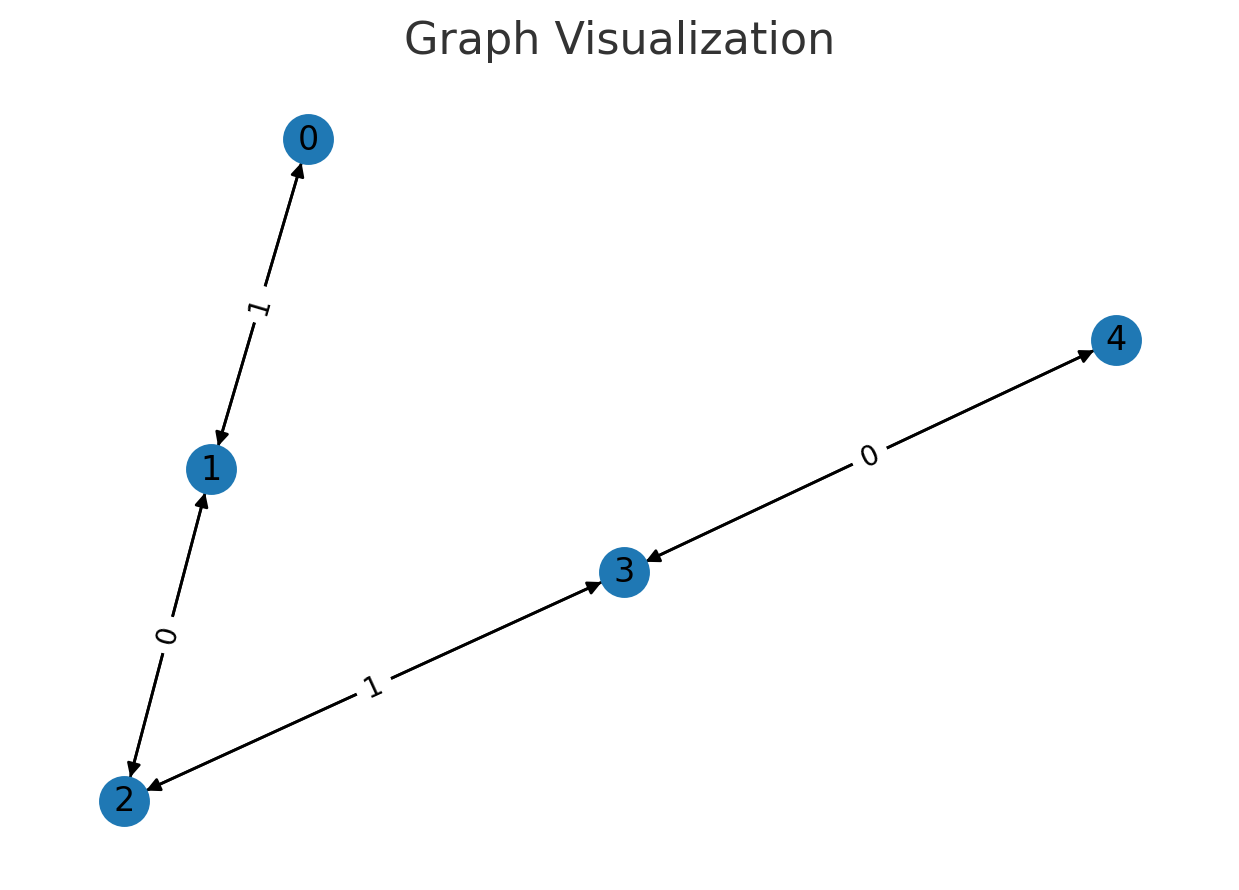

In [34]:
n = 6
connections = [[0,1],[1,3],[2,3],[4,0],[4,5]]
graph = [[] for _ in range(6)]
graph = get_graph(n, connections)
print(graph)
display_graph(graph)

[[(1, 1), (4, 0)], [(0, 0), (3, 1)], [(3, 1)], [(1, 0), (2, 0)], [(0, 1), (5, 1)], [(4, 0)]]
Node 0:[(1, 1), (4, 0)] 1 (needs reversal) 4 (already fine) 
Node 1:[(0, 0), (3, 1)] 0 (already fine) 3 (needs reversal) 
Node 2:[(3, 1)] 3 (needs reversal) 
Node 3:[(1, 0), (2, 0)] 1 (already fine) 2 (already fine) 
Node 4:[(0, 1), (5, 1)] 0 (needs reversal) 5 (needs reversal) 
Node 5:[(4, 0)] 4 (already fine) 


<style>
img {
    width: 400px;
}
</style>
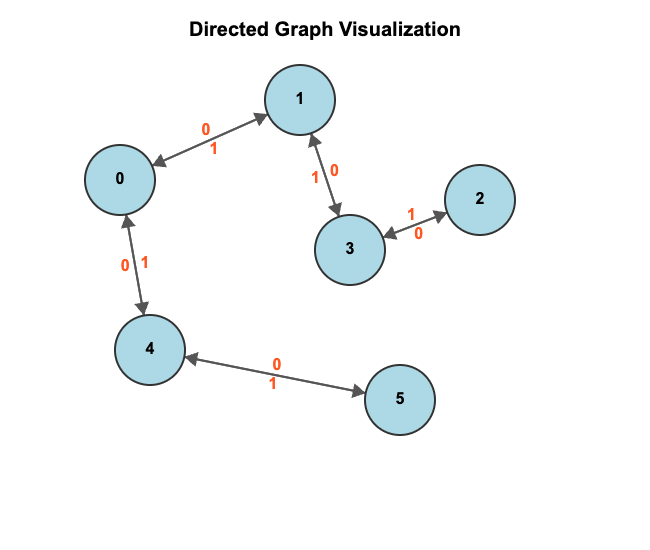

In [28]:
count = 0
visited = set()
def dfs(node, graph, visited, count):
    # count
    if node in visited:
        return
    visited.add(node)
    for neighbor, needs_reversal in graph[node]:
        if neighbor not in visited:
            print(f"Node: {node}, Neighbor: {neighbor}, Needs Reversal: {needs_reversal}, Visited: {visited}")
            if needs_reversal == 1:
                count += 1
            count = dfs(neighbor, graph, visited, count)
    return count
graph = [[] for _ in range(5)]
graph = get_graph(5,[[1,0],[1,2],[3,2],[3,4]])
print(graph)
count = dfs(0, graph, visited, count)
print(f"Count: {count}")

[[(1, 0)], [(0, 1), (2, 1)], [(1, 0), (3, 0)], [(2, 1), (4, 1)], [(3, 0)]]
Node: 0, Neighbor: 1, Needs Reversal: 0, Visited: {0}
Node: 1, Neighbor: 2, Needs Reversal: 1, Visited: {0, 1}
Node: 2, Neighbor: 3, Needs Reversal: 0, Visited: {0, 1, 2}
Node: 3, Neighbor: 4, Needs Reversal: 1, Visited: {0, 1, 2, 3}
Count: 2


In [35]:
graph = [[] for _ in range(5)]
n = 6
connections = [[0,1],[1,3],[2,3],[4,0],[4,5]]
graph = [[] for _ in range(6)]
graph = get_graph(n, connections)

visited = set()
count = 0
print(graph)
count = dfs(0, graph, visited, count)
print(f"Count: {count}")

[[(1, 1), (4, 0)], [(0, 0), (3, 1)], [(3, 1)], [(1, 0), (2, 0)], [(0, 1), (5, 1)], [(4, 0)]]
Node: 0, Neighbor: 1, Needs Reversal: 1, Visited: {0}
Node: 1, Neighbor: 3, Needs Reversal: 1, Visited: {0, 1}
Node: 3, Neighbor: 2, Needs Reversal: 0, Visited: {0, 1, 3}
Node: 0, Neighbor: 4, Needs Reversal: 0, Visited: {0, 1, 2, 3}
Node: 4, Neighbor: 5, Needs Reversal: 1, Visited: {0, 1, 2, 3, 4}
Count: 3


Problem Explanation:
Given n cities and some directed roads between them, we need to find the minimum number of roads to reorder (reverse direction) so that all cities can be reached from city 0.

The algorithm:

Start DFS from city 0.
When visiting a new city, check all outgoing roads:
- If a road goes FROM current city TO a new city, we need to reverse it (red arrows).
- If a road goes TO current city FROM a new city, it's already correct (green arrows).
The goal is to make all roads point toward city 0 (directly or indirectly).


<style>
img {
    width: 400px;
}
</style>
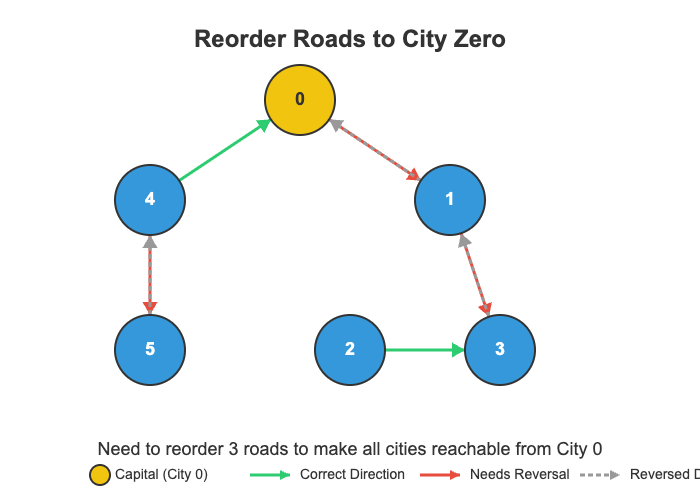

In [ ]:
from typing import List

class Solution:
    def minReorder(self, n: int, connections: List[List[int]]) -> int:
        graph = [[] for _ in range(n)]
        visited = set()
        count = 0
        def get_graph(n, connections):
            for a, b in connections:
                graph[a].append((b, 1))  # a → b (original, might need to reverse)
                graph[b].append((a, 0))  # b → a (already fine)
            return graph
       
        def dfs(node):
            nonlocal count
            if node in visited:
                return
            visited.add(node)
            for neighbor, needs_reversal in graph[node]:
                if neighbor not in visited:
                    if needs_reversal == 1:
                        count += 1
                    dfs(neighbor)
        get_graph(n, connections)
        dfs(0)
        return count

In [ ]:
s = Solution()
# count  = s.minReorder(6, [[0,1],[1,3],[2,3],[4,0],[4,5]])
n = 5
connections = [[1,0],[1,2],[3,2],[3,4]]

# n = 6
# connections = [[0,1],[1,3],[2,3],[4,0],[4,5]]
count = s.minReorder(n, connections)
print(count)

In [ ]:
n = 6
connections = [[1,0],[1,2],[3,2],[3,4]]
connections = [[0,1],[1,3],[2,3],[4,0],[4,5]]


In [22]:
# rooms = [[1],[2],[3],[]]
# rooms = [[1,3],[3,0,1],[2],[0]]
rooms = [[2],[],[1]]

s = Solution()
sol = s.canVisitAllRooms(rooms)
print(sol)

0 2 1 True
